In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import typing as tp
from matplotlib.axes import Axes


class CatExam:
    def __init__(self, path_to_df: str = "cat_exam_data.csv"):
        # read csv
        self.df = pd.DataFrame(pd.read_csv(path_to_df))

        # check for correct number of students from different rows
        assert all(self.df.groupby('school').agg(
            number_of_students=('number_of_students', lambda x: (min(x) == max(x))))['number_of_students'])
        #   all rows should be true

        # var for task 7 and 8
        self.df_top_schools = None

    def task1(self) -> pd.DataFrame:
        return self.df.head(5)

    def task2(self) -> tp.List[str]:
        df_nan_col = self.df.columns[
            (self.df.isna())  # mask for nans
            .any(axis=0)  # choose if col have at least one nan
        ]
        return [df_nan_col.item()]

    def task3(self) -> pd.DataFrame:
        # make sure we update df
        self.df = self.df.dropna()
        return self.df

    def task4(self) -> pd.DataFrame:
        # .describe() shows enough information
        return self.df.describe()

    def task5(self) -> int:
        return int(self.df['school'][self.df['test_score'] == 100].count())

    def task6(self) -> pd.DataFrame:
        # find oly those students with 100 points
        df_top_schools = self.df[self.df['test_score'] == 100]

        # group by school and count 100-point students
        df_top_schools = df_top_schools.groupby('school').agg(
            cnt_100=('test_score', 'count'),
            number_of_students=('number_of_students', 'min'))
        # for number of student: all of them are equal for any school (pick any)

        return df_top_schools.reset_index().sort_values(['cnt_100', 'school'],
                                                        ascending=[False, False])  # return in correct order

    def task7(self) -> pd.DataFrame:
        # group by school and calculate mean
        df_top_schools = self.df.groupby('school').agg(
            test_score=('test_score', 'mean'),
            number_of_students=(
                'number_of_students',
                'min'))

        # reset index, sort and save for next task
        self.df_top_schools = df_top_schools.reset_index()
        return self.df_top_schools.sort_values(['test_score'], ascending=[False]).head(10)

    def task8(self) -> pd.DataFrame:
        return self.df_top_schools.sort_values(['test_score'], ascending=[True]).head(10)

    def task9(self) -> Axes:
        # set parameters
        bins = 10
        alpha = 0.5

        # Divide Dataset into 2 parts
        small_schools = self.df[self.df['number_of_students'] <= 1000]['test_score']
        big_schools = self.df[self.df['number_of_students'] > 1000]['test_score']

        # Plot
        fig, ax = plt.subplots()
        ax.hist([small_schools, big_schools], bins=bins, alpha=alpha)

        plt.ticklabel_format(style='sci', scilimits=[-4, 4], axis='both', useMathText=True)

        ax.set_title('Зависимость балла от школы')
        ax.set_xlabel('Балл за экзамен')
        ax.set_ylabel('Число учеников')

        # Add a legend
        ax.legend(['Small Schools', 'Big Schools'])
        return plt.gca()
        # Add a title and axis labels to the plot

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [7]:
exam = CatExam('..//Data/task2_data/cat_exam_data.csv')
exam.task3()
exam.task7()
print('Done')

Done


<Axes: title={'center': 'Зависимость балла от школы'}, xlabel='Балл за экзамен', ylabel='Число учеников'>

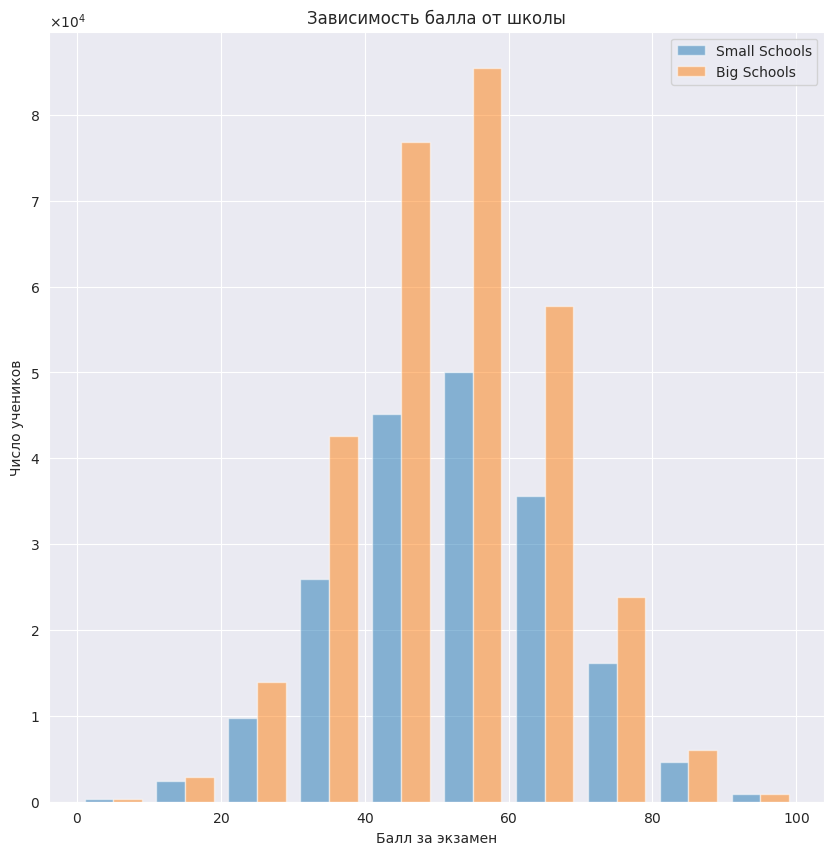

In [8]:
exam.task9()